__Subject:__      Infering City Population Size from City Data

__Date:__         07/20/2018

__Name:__         Edmund D. Chitwood

***

__Notebook Summary:__<br> 
<br>The following Notebook 
-  loads data from a pickled file, 
-  performs exploratory data analysis,
-  tranforms data,
-  models the data to make predictions,
-  examines the quality of those models.

***

In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression, Lasso, Ridge
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load Data

In [2]:
all_cities = pd.read_pickle('all_cities_clean.pkl')

# Exploratory Data Analysis

In [3]:
all_cities.head()

,Annual Precipitation Inches,Area,Average High Temp,Average Low Temp,City Name,Elevation,Latitude,Longitude,Population,URL
0,39.920000,14.610000,64.000000,53.200000,A Coruña,190.000000,43.36500,-8.41000,246056.0,https://en.wikipedia.org/wiki/A_Coru%C3%B1a
2,23.626000,54.000000,52.000000,39.600000,Aalborg,16.000000,57.05000,9.91700,112194.0,https://en.wikipedia.org/wiki/Aalborg
4,37.627009,28.000000,71.937604,53.611716,Aba,673.000000,5.11700,7.36700,534265.0,"https://en.wikipedia.org/wiki/Aba,_Nigeria"
6,37.627009,166.400000,71.937604,53.611716,Abaetetuba,138.000000,-1.71778,-48.88278,141054.0,https://en.wikipedia.org/wiki/Abaetetuba
7,12.378000,942.897766,45.000000,25.000000,Abakan,1320.820849,53.71700,91.46700,165214.0,https://en.wikipedia.org/wiki/Abakan


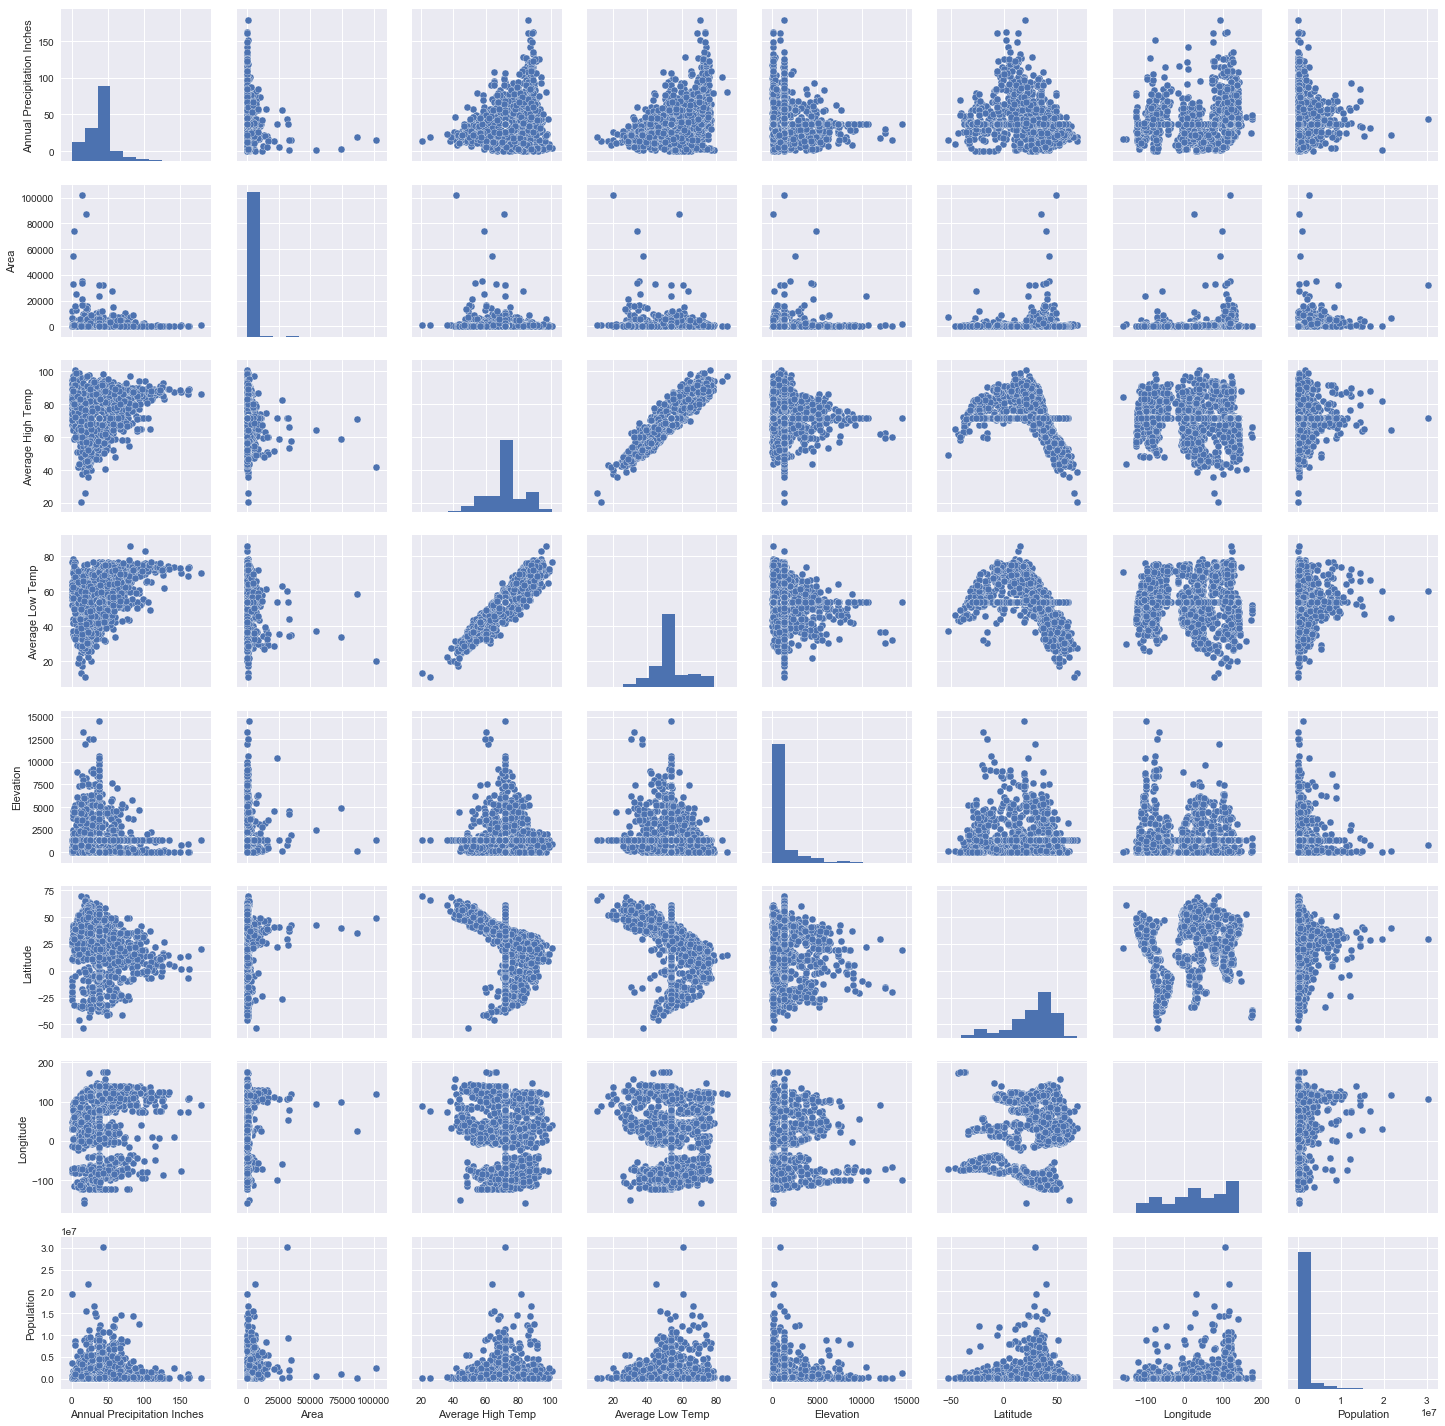

In [4]:
sns.pairplot(all_cities)

# Data Tranformation

In [5]:
# From the pair plots, it is clear that the distribution of populations is right skewed.
# Take the log of population to mitigate right skew.
# Populations Log will now be the target of the analysis.
all_cities['Population Log'] = np.log(all_cities['Population'])

In [6]:
all_cities.head()

,Annual Precipitation Inches,Area,Average High Temp,Average Low Temp,City Name,Elevation,Latitude,Longitude,Population,URL,Population Log
0,39.920000,14.610000,64.000000,53.200000,A Coruña,190.000000,43.36500,-8.41000,246056.0,https://en.wikipedia.org/wiki/A_Coru%C3%B1a,12.413314
2,23.626000,54.000000,52.000000,39.600000,Aalborg,16.000000,57.05000,9.91700,112194.0,https://en.wikipedia.org/wiki/Aalborg,11.627985
4,37.627009,28.000000,71.937604,53.611716,Aba,673.000000,5.11700,7.36700,534265.0,"https://en.wikipedia.org/wiki/Aba,_Nigeria",13.188647
6,37.627009,166.400000,71.937604,53.611716,Abaetetuba,138.000000,-1.71778,-48.88278,141054.0,https://en.wikipedia.org/wiki/Abaetetuba,11.856898
7,12.378000,942.897766,45.000000,25.000000,Abakan,1320.820849,53.71700,91.46700,165214.0,https://en.wikipedia.org/wiki/Abakan,12.014997


# Exploratory Data Analysis

In [7]:
all_cities.drop('Population', axis=1, inplace=True)

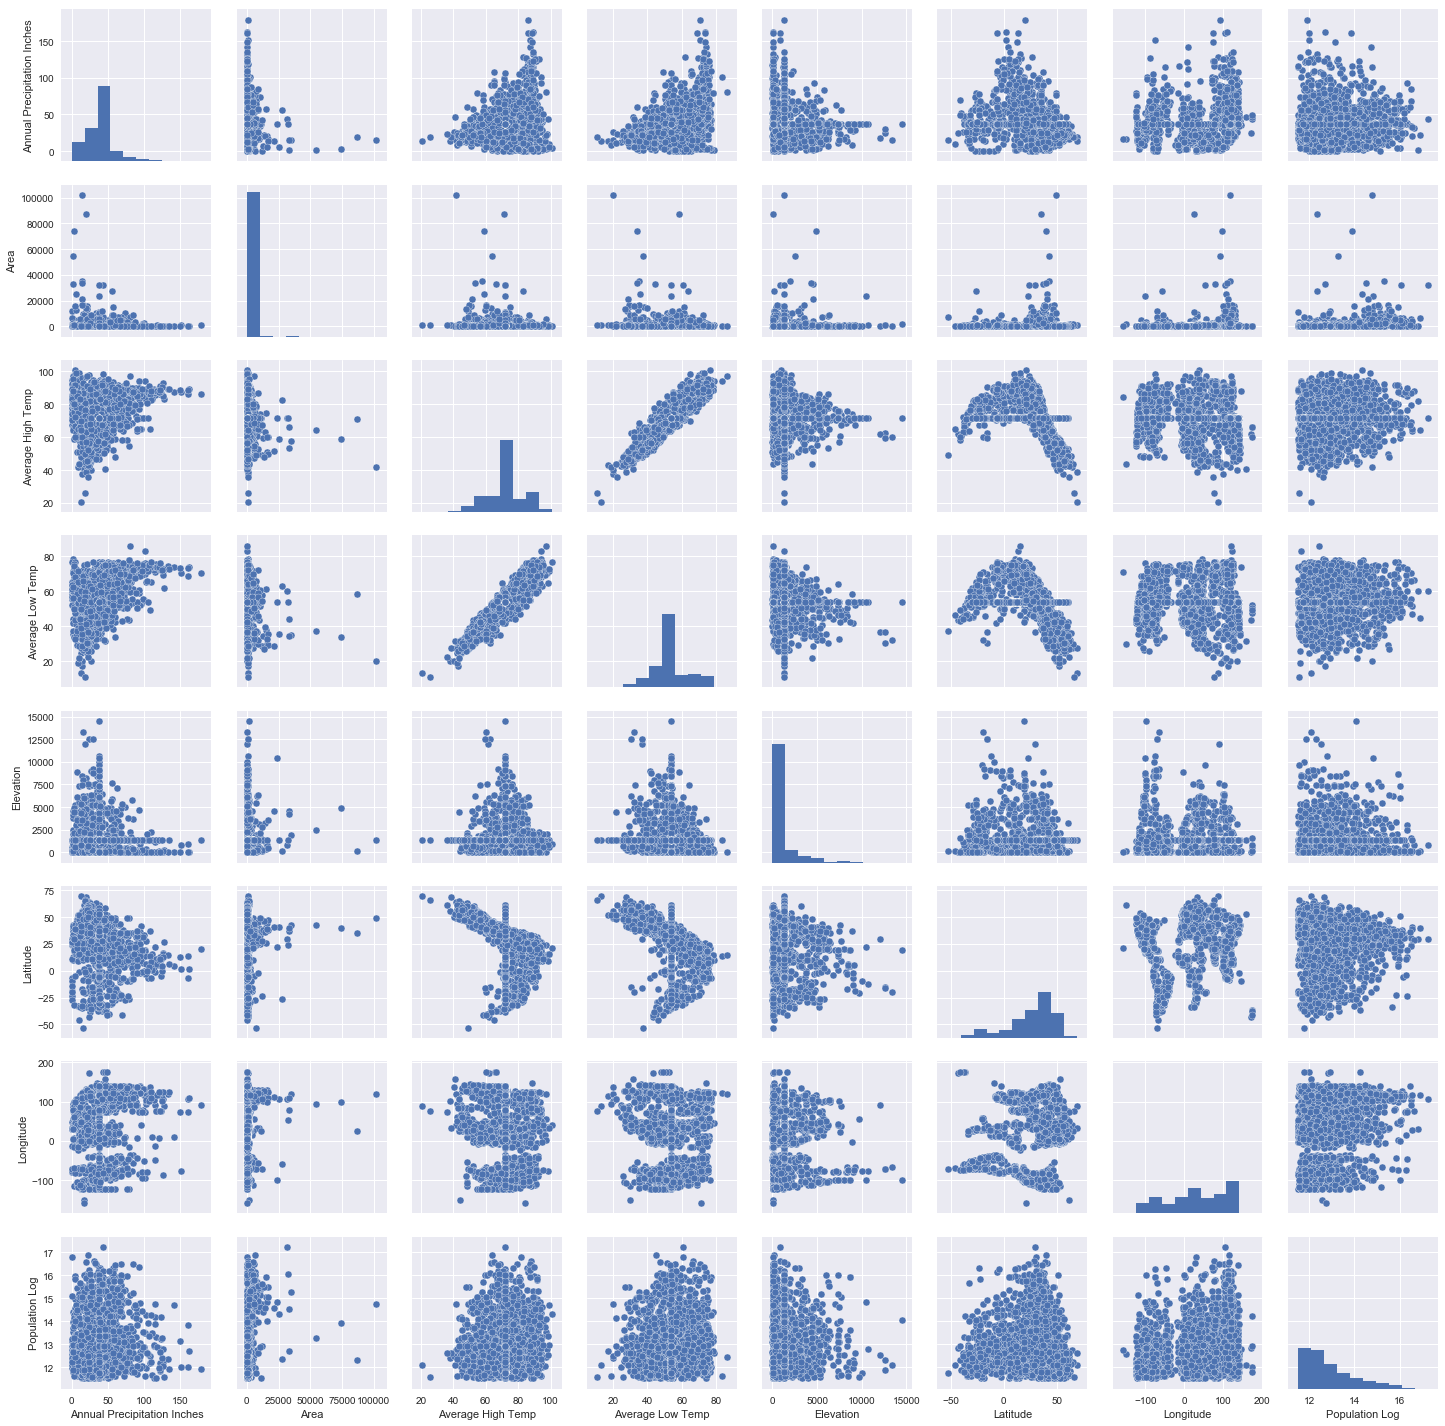

In [8]:
sns.pairplot(all_cities)

__Observations of the Above Pairplots:__<br> 
-  None of the features (i.e. Annual Precipitation Inches, Area, Average High Temp, Average Low Temp, Elevation, Latitue, Longitude) appear to have a linear relationship with the log of Population.
- The presence of imputed mean values is quite obvous for some features (e.g. Average High Temp, Elevation).

In [9]:
all_cities.corr()

,Annual Precipitation Inches,Area,Average High Temp,Average Low Temp,Elevation,Latitude,Longitude,Population Log
Annual Precipitation Inches,1.000000,-0.078017,0.296437,0.444597,-0.099274,-0.240933,0.181352,0.035908
Area,-0.078017,1.000000,-0.092785,-0.107940,0.052975,0.040917,0.118123,0.245101
Average High Temp,0.296437,-0.092785,1.000000,0.934111,-0.048685,-0.462210,0.017189,0.110664
Average Low Temp,0.444597,-0.107940,0.934111,1.000000,-0.153025,-0.443030,0.079124,0.127547
Elevation,-0.099274,0.052975,-0.048685,-0.153025,1.000000,-0.171392,-0.094459,0.048781
Latitude,-0.240933,0.040917,-0.462210,-0.443030,-0.171392,1.000000,0.194196,-0.029499
Longitude,0.181352,0.118123,0.017189,0.079124,-0.094459,0.194196,1.000000,0.250949
Population Log,0.035908,0.245101,0.110664,0.127547,0.048781,-0.029499,0.250949,1.000000


/Users/edmund/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


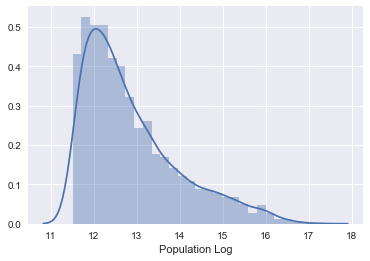

In [10]:
sns.distplot(all_cities['Population Log'])

# Modeling and Predicting

In [11]:
# Run a baseline linear regression model and producce OLS regression summary stats.
X=all_cities.loc[:,['Annual Precipitation Inches','Area','Average High Temp', 'Average Low Temp', 'Elevation',
            'Latitude','Longitude']]

y=all_cities['Population Log']

model = sm.OLS(y,sm.add_constant(X))
results = model.fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Population Log   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     55.21
Date:                Wed, 25 Jul 2018   Prob (F-statistic):           1.62e-73
Time:                        14:28:09   Log-Likelihood:                -3485.1
No. Observations:                2417   AIC:                             6986.
Df Residuals:                    2409   BIC:                             7032.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          12.0420      0.192     62.691      0.000      11.665      12.419
Annual Precipitation Inches    -0.0040      0.001     -3.179      0.001      -0.006      -0.002
Area                         6.188e-05   5.22e-06     11.853      0.000    5.16e-05    7.21e-05
Average High Temp              -0.0121      0.006     -1.963      0.050      -0.024   -1.46e-05
Average Low Temp                0.0304      0.007      4.417      0.000       0.017       0.044
Elevation                    6.093e-05   1.45e-05      4.194      0.000    3.24e-05    8.94e-05
Latitude                       -0.0007      0.001     -0.657      0.511      -0.003       0.001
Longitude                       0.0033      0.000     11.278      0.000       0.003       0.004
==============================================================================
Omnibus:                      219.264   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.369
Skew:                           0.727   Prob(JB):                     8.07e-67
Kurtosis:                       3.952   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Observations of the Above OLS Regression Results:__<br> 
-  One cannot reject the null hypothesis based on Probability F-Statistic.
-  Longitude and Annual Precipitation Inches appear to be collinear.
-  P value for Latitude is quite high.

Text(0,0.5,'Residual')

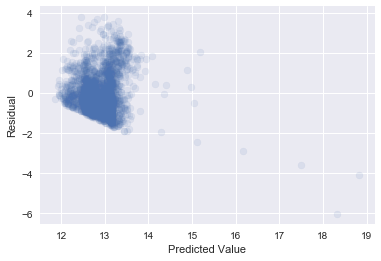

In [12]:
# Use baseline linear regression model to make predictions.
# Plot predicted population values vs. the differnce between predictions and acutal city populations.

y_pred  =  results.predict(sm.add_constant(X))

plt.scatter(y_pred,y-y_pred,alpha=.1)
plt.plot()
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

__Observations of the Above Residuals vs. Predicted Values:__<br> 
-  The basline linear regression model is significantly over-predicting and underpredicting for most cities, but the median predicted value is somewhat centered around a residual value of zero.
- For small to medium sized cities, underpredictions exhibit more bias than do the over predictions, which exhiit more variance.
-  The model is under-predicting population for cities with relatively large populations. 

In [13]:
# Create polynomials of features.

def add_square_terms(df):    
    
    df_poly = df.copy()
    
    for c in df.columns:
        df_poly[c + '**2'] = df[c]**2
        
    return df_poly

In [14]:
# Drop non-numerical series for purposes of feature engineering.

all_cities.drop('City Name', axis=1, inplace=True)
all_cities.drop('URL', axis=1, inplace=True)

In [15]:
def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))

In [16]:
# Split data into train and test sets.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=3)

# Run a baseline linear regression and produce R Square and Root Mean Square Error (RMSE).
lm = LinearRegression()
lm.fit(X_train, y_train)
print('OLS regression score val R^2: %.3f' % lm.score(X_val, y_val))
print('OLS regression score val RMSE: %.3f \n' % RMSE(lm.predict(X_val), y_val))

# Repeat with polynomial features.
lm.fit(add_square_terms(X_train), y_train)
print('Degree 2 polynomial regression val R^2: %.3f' 
      % lm.score(add_square_terms(X_val), y_val))
print('Degree 2 polynomial regression score val RMSE: %.3f' 
      % RMSE(lm.predict(add_square_terms(X_val)), y_val))

OLS regression score val R^2: 0.140
OLS regression score val RMSE: 1.000 

Degree 2 polynomial regression val R^2: 0.241
Degree 2 polynomial regression score val RMSE: 0.940


__Observations of the Above R Squared and RMSE Scores:__<br> 
-  R Squared and RMSE are both slightly improved by Polynomial Regression Model.

Text(0,0.5,'Residual')

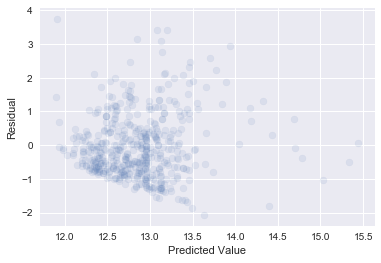

In [17]:
y_pred = lm.predict(add_square_terms(X_val))

plt.scatter(y_pred,y_val-y_pred,alpha=.1)
plt.plot()
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

__Observations of the Above Residuals vs. Predicted Values:__<br> 
-  The trends observed in the predictions of the regression model hold true in the polynomial model for the most part.
-  It now seems clear that the model is underpredicting the populations of most cities.
-  It appears that the model is doing a better job at predicting the populations of cities with large values, but that might be due to the train/test split.

In [18]:
# Add interaction terms.
dict(zip(add_square_terms(X_train).columns, lm.coef_))

{'Annual Precipitation Inches': -0.0034831457312206843,
 'Area': 0.00020092393875288943,
 'Average High Temp': -0.20202887557350227,
 'Average Low Temp': 0.08861519299190858,
 'Elevation': 3.014189190511301e-05,
 'Latitude': 0.005531114835976059,
 'Longitude': 0.002080706195036944,
 'Annual Precipitation Inches**2': -2.1746568612181603e-06,
 'Area**2': -2.1975624943029474e-09,
 'Average High Temp**2': 0.001196707245372694,
 'Average Low Temp**2': -0.00047616184656064397,
 'Elevation**2': 1.9091508938355676e-09,
 'Latitude**2': -0.00031343986227486527,
 'Longitude**2': 4.569622155136016e-06}

In [19]:
# Predict with Interaction Terms.
interactions = PolynomialFeatures(degree=2, interaction_only=True)

lm.fit(interactions.fit_transform(X_train), y_train)
print('OLS regression with interaction terms val R^2: %.3f' % lm.score(interactions.transform(X_val), y_val))
print('OLS regression with interaction terms val RMSE: %.3f' 
      % RMSE(lm.predict(interactions.fit_transform(X_val)), y_val))


OLS regression with interaction terms val R^2: 0.242
OLS regression with interaction terms val RMSE: 0.939


In [20]:
lm.predict(interactions.fit_transform(X_val))
print('OLS regression with interaction terms val R^2: %.3f' % lm.score(interactions.transform(X_val), y_val))
print('OLS regression with interaction terms val RMSE: %.3f' 
      % RMSE(lm.predict(interactions.fit_transform(X_val)), y_val))

OLS regression with interaction terms val R^2: 0.242
OLS regression with interaction terms val RMSE: 0.939


__Observations of the Above R Squared and RMSE Scores:__<br> 
-  R Squared and RMSE are pretty much the same after introducing interaction terms.

Text(0,0.5,'Residual')

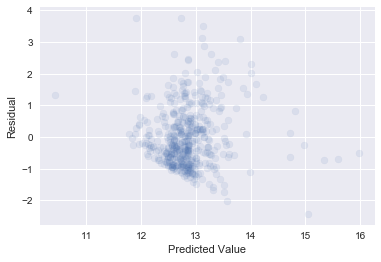

In [21]:
y_pred = lm.predict(interactions.fit_transform(X_val))

plt.scatter(y_pred,y_val-y_pred,alpha=.1)
plt.plot()
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

In [22]:
# Predict with Random Forest.
rf = RandomForestRegressor(n_estimators=1800, max_features=3)
rf.fit(X_train, y_train)
rf.score(X_val, y_val)

0.5364157140517709

In [23]:
RMSE(rf.predict(X_val),y_val)

0.7340962036433715

__Observations of the above R Squared and RMSE Scores:__<br> 
-  Random Forest generated the best R Squared and RMSE.
-  Random Forest does a better job of capturing non-linear relatiomships between features and target than regression does.

In [24]:
gbm = GradientBoostingRegressor(n_estimators=1600, max_depth=3, learning_rate=.01)
gbm.fit(X_train, y_train)
gbm.score(X_val, y_val)

0.500343841892778

In [25]:
RMSE(gbm.predict(X_val),y_val)

0.7621215589210898

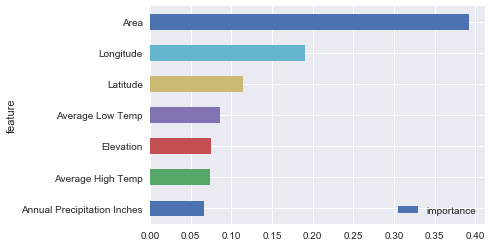

In [26]:
feat_imps = list(zip(X_train.columns,rf.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')

__Observations of the Above Bar Graph:__<br> 
-  Like the baseline linear regression model, Random Forest indicates that area is the most important feature for predicting population.
-  Random Forest does a better job of capturing non-linear relatiomships between features and target than regression does.

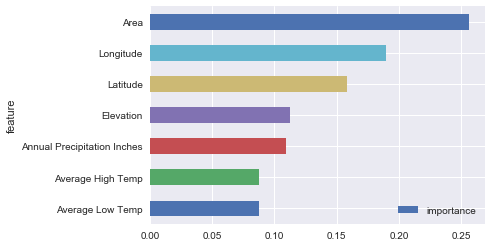

In [27]:
feat_imps = list(zip(X_train.columns,gbm.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')

__Observations of the Above Bar Graph:__<br> 
-  GDM ranks features in terms of their importance in a manner similiar to that of Random Forest.
-  However, area is less important relative to other features.
-  Like with Random Forest, latitude and longitude are the second and third most important features, but now by a wider margin.
-  It appears that it is worth further investigating the relationship between the area, latitude and longitude features, and population.